In [25]:
import pandas as pd

In [26]:
file_path = 'Reportev2.csv'
df_initial = pd.read_csv(file_path)
df_initial

,id_claim_number,id_case_number,case_serial,date_created,sku,name,user_description,id_dispatch_center,value
0,1790,2868,RC-1790-CS-2868-GT,2023-10-06 09:40:35.095,50000615,Calidad,Seleccion de tipo problema de calidad,1063,rust
1,1790,2868,RC-1790-CS-2868-GT,2023-10-06 09:40:35.095,50000615,Calidad,Cantidad reportada problemas de calidad,1063,22
2,1790,2868,RC-1790-CS-2868-GT,2023-10-06 09:40:35.095,50000615,Calidad,"Cliente se queda con el producto, problemas de...",1063,true
3,1790,2868,RC-1790-CS-2868-GT,2023-10-06 09:40:35.095,50000615,Calidad,Campo que almacena el valor de descuento selec...,1063,30.65
4,2211,3240,RC-2211-CS-3240-PA,2024-04-05 07:34:23.742,50000853,Cantidad diferente,Resultado de seleccion producto faltante o sob...,6083,missing_amount
...,...,...,...,...,...,...,...,...,...
5271,3784,4794,RC-3784-CS-4794-GT,2024-09-30 20:44:36.665,50000543,Calidad,"Cliente se queda con el producto, problemas de...",1072,true
5272,3780,4795,RC-3780-CS-4795-GT,2024-09-30 22:51:03.044,50000281,Cantidad diferente,Resultado de seleccion producto faltante o sob...,1072,leftover_quantity
5273,3780,4795,RC-3780-CS-4795-GT,2024-09-30 22:51:03.044,50000281,Cantidad diferente,Cantidad reportada cantidad diferente,1072,05
5274,3780,4796,RC-3780-CS-4796-GT,2024-09-30 23:16:29.426,50000543,Cantidad diferente,Resultado de seleccion producto faltante o sob...,1072,leftover_quantity


In [27]:
# Pivotar el DataFrame: crear columnas para cada valor de 'user_description' con sus correspondientes 'value'
df_pivot = df_initial.pivot_table(index=['id_claim_number', 'id_case_number', 'case_serial', 'date_created', 'sku', 'name', 'id_dispatch_center'],
                          columns='user_description', values='value', aggfunc='first').reset_index()

df_pivot

user_description,id_claim_number,id_case_number,case_serial,date_created,sku,name,id_dispatch_center,Campo de seleccion de razon entrega tarde,Campo de seleccion para determinar si la ruta se agino tarde o no,Campo que almacena el valor de descuento seleccionado por problemas de calidad,...,Cantidad reportada problemas de calidad,Cantidad reportada producto cruzado,"Cliente se queda con el producto, entrega tarde","Cliente se queda con el producto, problemas de calidad","Cliente se queda con el producto, producto cruzado",Resultado de seleccion producto faltante o sobrante,Seleccion de tipo problema de calidad,"Valor ingresado, tiempo o fecha","Vendedor selecciona solicitar un descuento o no, problemas de calidad",producto seleccionado flujo cantidad diferente
0,1790,2868,RC-1790-CS-2868-GT,2023-10-06 09:40:35.095,50000615,Calidad,1063,NaN,NaN,30.65,...,22,NaN,NaN,true,NaN,NaN,rust,NaN,NaN,NaN
1,1801,2875,RC-1801-CS-2875-GT,2023-10-19 12:00:55.143,50000086,Calidad,1072,NaN,NaN,2.00,...,1,NaN,NaN,true,NaN,NaN,fold,NaN,NaN,NaN
2,1802,2876,RC-1802-CS-2876-GT,2023-10-19 16:33:27.839,50000647,Calidad,1072,NaN,NaN,NaN,...,2,NaN,NaN,false,NaN,NaN,rust,NaN,NaN,NaN
3,1804,2878,RC-1804-CS-2878-GT,2023-10-24 15:01:48.867,50000532,Calidad,1072,NaN,NaN,NaN,...,01,NaN,NaN,NaN,NaN,NaN,damaged,NaN,NaN,NaN
4,1804,2879,RC-1804-CS-2879-GT,2023-10-24 15:03:34.616,50000719,Calidad,1072,NaN,NaN,NaN,...,02,NaN,NaN,NaN,NaN,NaN,fold,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,3780,4793,RC-3780-CS-4793-GT,2024-09-30 18:19:02.348,50000543,Calidad,1072,NaN,NaN,5.30,...,01,NaN,NaN,true,NaN,NaN,manufacture_issue,NaN,true,NaN
1629,3780,4795,RC-3780-CS-4795-GT,2024-09-30 22:51:03.044,50000281,Cantidad diferente,1072,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,leftover_quantity,NaN,NaN,NaN,NaN
1630,3780,4796,RC-3780-CS-4796-GT,2024-09-30 23:16:29.426,50000543,Cantidad diferente,1072,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,leftover_quantity,NaN,NaN,NaN,NaN
1631,3781,4785,RC-3781-CS-4785-NI,2024-09-26 20:57:38.589,50000058,Calidad,4131,NaN,NaN,5.50,...,2,NaN,NaN,true,NaN,NaN,rust,NaN,true,NaN


In [28]:
conteo_por_name = df_pivot['name'].value_counts()

print(conteo_por_name)

name
Calidad                                       1113
Cantidad diferente                             416
Producto cruzado                                97
Entrega tarde                                    6
Diferencia entre solicitado OC y entregado       1
Name: count, dtype: int64


In [29]:
# Renombrar las columnas para eliminar multiindex en el nombre de las columnas
df_pivot.columns.name = None

In [30]:
# Extraer los últimos dos caracteres de 'case_serial' para identificar el país
df_pivot['country'] = df_pivot['case_serial'].str[-2:]
df_pivot

,id_claim_number,id_case_number,case_serial,date_created,sku,name,id_dispatch_center,Campo de seleccion de razon entrega tarde,Campo de seleccion para determinar si la ruta se agino tarde o no,Campo que almacena el valor de descuento seleccionado por problemas de calidad,...,Cantidad reportada producto cruzado,"Cliente se queda con el producto, entrega tarde","Cliente se queda con el producto, problemas de calidad","Cliente se queda con el producto, producto cruzado",Resultado de seleccion producto faltante o sobrante,Seleccion de tipo problema de calidad,"Valor ingresado, tiempo o fecha","Vendedor selecciona solicitar un descuento o no, problemas de calidad",producto seleccionado flujo cantidad diferente,country
0,1790,2868,RC-1790-CS-2868-GT,2023-10-06 09:40:35.095,50000615,Calidad,1063,NaN,NaN,30.65,...,NaN,NaN,true,NaN,NaN,rust,NaN,NaN,NaN,GT
1,1801,2875,RC-1801-CS-2875-GT,2023-10-19 12:00:55.143,50000086,Calidad,1072,NaN,NaN,2.00,...,NaN,NaN,true,NaN,NaN,fold,NaN,NaN,NaN,GT
2,1802,2876,RC-1802-CS-2876-GT,2023-10-19 16:33:27.839,50000647,Calidad,1072,NaN,NaN,NaN,...,NaN,NaN,false,NaN,NaN,rust,NaN,NaN,NaN,GT
3,1804,2878,RC-1804-CS-2878-GT,2023-10-24 15:01:48.867,50000532,Calidad,1072,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,damaged,NaN,NaN,NaN,GT
4,1804,2879,RC-1804-CS-2879-GT,2023-10-24 15:03:34.616,50000719,Calidad,1072,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,fold,NaN,NaN,NaN,GT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,3780,4793,RC-3780-CS-4793-GT,2024-09-30 18:19:02.348,50000543,Calidad,1072,NaN,NaN,5.30,...,NaN,NaN,true,NaN,NaN,manufacture_issue,NaN,true,NaN,GT
1629,3780,4795,RC-3780-CS-4795-GT,2024-09-30 22:51:03.044,50000281,Cantidad diferente,1072,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,leftover_quantity,NaN,NaN,NaN,NaN,GT
1630,3780,4796,RC-3780-CS-4796-GT,2024-09-30 23:16:29.426,50000543,Cantidad diferente,1072,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,leftover_quantity,NaN,NaN,NaN,NaN,GT
1631,3781,4785,RC-3781-CS-4785-NI,2024-09-26 20:57:38.589,50000058,Calidad,4131,NaN,NaN,5.50,...,NaN,NaN,true,NaN,NaN,rust,NaN,true,NaN,NI


In [31]:
type_cases = df_initial['name'].unique()
type_cases

array(['Calidad', 'Cantidad diferente', 'Producto cruzado',
       'Diferencia entre solicitado OC y entregado', 'Entrega tarde'],
      dtype=object)

In [32]:
df_filtered = df_pivot

In [33]:
# Filtrar los casos relevantes, en nuestro caso los casos de Calidad, cantidad diferente y producto cruzado
df_filtered = df_pivot[df_pivot['name'].isin(['Calidad', 'Cantidad diferente', 'Producto cruzado'])]
df_filtered

,id_claim_number,id_case_number,case_serial,date_created,sku,name,id_dispatch_center,Campo de seleccion de razon entrega tarde,Campo de seleccion para determinar si la ruta se agino tarde o no,Campo que almacena el valor de descuento seleccionado por problemas de calidad,...,Cantidad reportada producto cruzado,"Cliente se queda con el producto, entrega tarde","Cliente se queda con el producto, problemas de calidad","Cliente se queda con el producto, producto cruzado",Resultado de seleccion producto faltante o sobrante,Seleccion de tipo problema de calidad,"Valor ingresado, tiempo o fecha","Vendedor selecciona solicitar un descuento o no, problemas de calidad",producto seleccionado flujo cantidad diferente,country
0,1790,2868,RC-1790-CS-2868-GT,2023-10-06 09:40:35.095,50000615,Calidad,1063,NaN,NaN,30.65,...,NaN,NaN,true,NaN,NaN,rust,NaN,NaN,NaN,GT
1,1801,2875,RC-1801-CS-2875-GT,2023-10-19 12:00:55.143,50000086,Calidad,1072,NaN,NaN,2.00,...,NaN,NaN,true,NaN,NaN,fold,NaN,NaN,NaN,GT
2,1802,2876,RC-1802-CS-2876-GT,2023-10-19 16:33:27.839,50000647,Calidad,1072,NaN,NaN,NaN,...,NaN,NaN,false,NaN,NaN,rust,NaN,NaN,NaN,GT
3,1804,2878,RC-1804-CS-2878-GT,2023-10-24 15:01:48.867,50000532,Calidad,1072,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,damaged,NaN,NaN,NaN,GT
4,1804,2879,RC-1804-CS-2879-GT,2023-10-24 15:03:34.616,50000719,Calidad,1072,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,fold,NaN,NaN,NaN,GT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,3780,4793,RC-3780-CS-4793-GT,2024-09-30 18:19:02.348,50000543,Calidad,1072,NaN,NaN,5.30,...,NaN,NaN,true,NaN,NaN,manufacture_issue,NaN,true,NaN,GT
1629,3780,4795,RC-3780-CS-4795-GT,2024-09-30 22:51:03.044,50000281,Cantidad diferente,1072,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,leftover_quantity,NaN,NaN,NaN,NaN,GT
1630,3780,4796,RC-3780-CS-4796-GT,2024-09-30 23:16:29.426,50000543,Cantidad diferente,1072,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,leftover_quantity,NaN,NaN,NaN,NaN,GT
1631,3781,4785,RC-3781-CS-4785-NI,2024-09-26 20:57:38.589,50000058,Calidad,4131,NaN,NaN,5.50,...,NaN,NaN,true,NaN,NaN,rust,NaN,true,NaN,NI


In [34]:
# Eliminar las columnas no necesarias, ahora que ya hemos filtrado solo los casos que vamos a trabajar
columns_to_drop = [
    "Campo de seleccion de razon entrega tarde",
    "Campo de seleccion para determinar si la ruta se agino tarde o no",
    "Cliente se queda con el producto, entrega tarde",
    "Valor ingresado, tiempo o fecha", "case_serial", "id_claim_number", "id_case_number", "producto seleccionado flujo cantidad diferente", 
    "Vendedor selecciona solicitar un descuento o no, problemas de calidad", "Campo que almacena el valor de descuento seleccionado por problemas de calidad"
]

In [35]:
conteo_por_name = df_pivot['name'].value_counts()

print(conteo_por_name)

name
Calidad                                       1113
Cantidad diferente                             416
Producto cruzado                                97
Entrega tarde                                    6
Diferencia entre solicitado OC y entregado       1
Name: count, dtype: int64


In [36]:
df_filtered.drop(columns=columns_to_drop, inplace=True)
df_filtered

C:\Users\Lotus\AppData\Local\Temp\ipykernel_22600\1722644830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=columns_to_drop, inplace=True)


,date_created,sku,name,id_dispatch_center,Cantidad reportada cantidad diferente,Cantidad reportada problemas de calidad,Cantidad reportada producto cruzado,"Cliente se queda con el producto, problemas de calidad","Cliente se queda con el producto, producto cruzado",Resultado de seleccion producto faltante o sobrante,Seleccion de tipo problema de calidad,country
0,2023-10-06 09:40:35.095,50000615,Calidad,1063,NaN,22,NaN,true,NaN,NaN,rust,GT
1,2023-10-19 12:00:55.143,50000086,Calidad,1072,NaN,1,NaN,true,NaN,NaN,fold,GT
2,2023-10-19 16:33:27.839,50000647,Calidad,1072,NaN,2,NaN,false,NaN,NaN,rust,GT
3,2023-10-24 15:01:48.867,50000532,Calidad,1072,NaN,01,NaN,NaN,NaN,NaN,damaged,GT
4,2023-10-24 15:03:34.616,50000719,Calidad,1072,NaN,02,NaN,NaN,NaN,NaN,fold,GT
...,...,...,...,...,...,...,...,...,...,...,...,...
1628,2024-09-30 18:19:02.348,50000543,Calidad,1072,NaN,01,NaN,true,NaN,NaN,manufacture_issue,GT
1629,2024-09-30 22:51:03.044,50000281,Cantidad diferente,1072,05,NaN,NaN,NaN,NaN,leftover_quantity,NaN,GT
1630,2024-09-30 23:16:29.426,50000543,Cantidad diferente,1072,05,NaN,NaN,NaN,NaN,leftover_quantity,NaN,GT
1631,2024-09-26 20:57:38.589,50000058,Calidad,4131,NaN,2,NaN,true,NaN,NaN,rust,NI


In [37]:
# Unificar las columnas de cantidades reportadas en una sola columna 'Cantidad Reportada'
df_filtered['reported_quantity'] = (
    df_filtered[['Cantidad reportada problemas de calidad', 'Cantidad reportada cantidad diferente', 'Cantidad reportada producto cruzado']]
    .bfill(axis=1).iloc[:, 0]
)
df_filtered

C:\Users\Lotus\AppData\Local\Temp\ipykernel_22600\4127332039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['reported_quantity'] = (


,date_created,sku,name,id_dispatch_center,Cantidad reportada cantidad diferente,Cantidad reportada problemas de calidad,Cantidad reportada producto cruzado,"Cliente se queda con el producto, problemas de calidad","Cliente se queda con el producto, producto cruzado",Resultado de seleccion producto faltante o sobrante,Seleccion de tipo problema de calidad,country,reported_quantity
0,2023-10-06 09:40:35.095,50000615,Calidad,1063,NaN,22,NaN,true,NaN,NaN,rust,GT,22
1,2023-10-19 12:00:55.143,50000086,Calidad,1072,NaN,1,NaN,true,NaN,NaN,fold,GT,1
2,2023-10-19 16:33:27.839,50000647,Calidad,1072,NaN,2,NaN,false,NaN,NaN,rust,GT,2
3,2023-10-24 15:01:48.867,50000532,Calidad,1072,NaN,01,NaN,NaN,NaN,NaN,damaged,GT,01
4,2023-10-24 15:03:34.616,50000719,Calidad,1072,NaN,02,NaN,NaN,NaN,NaN,fold,GT,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,2024-09-30 18:19:02.348,50000543,Calidad,1072,NaN,01,NaN,true,NaN,NaN,manufacture_issue,GT,01
1629,2024-09-30 22:51:03.044,50000281,Cantidad diferente,1072,05,NaN,NaN,NaN,NaN,leftover_quantity,NaN,GT,05
1630,2024-09-30 23:16:29.426,50000543,Cantidad diferente,1072,05,NaN,NaN,NaN,NaN,leftover_quantity,NaN,GT,05
1631,2024-09-26 20:57:38.589,50000058,Calidad,4131,NaN,2,NaN,true,NaN,NaN,rust,NI,2


In [38]:
# Eliminar las columnas de cantidad originales ya que están unificadas
df_filtered.drop(columns=['Cantidad reportada problemas de calidad', 'Cantidad reportada cantidad diferente', 'Cantidad reportada producto cruzado'], inplace=True)
df_filtered

C:\Users\Lotus\AppData\Local\Temp\ipykernel_22600\738425841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['Cantidad reportada problemas de calidad', 'Cantidad reportada cantidad diferente', 'Cantidad reportada producto cruzado'], inplace=True)


,date_created,sku,name,id_dispatch_center,"Cliente se queda con el producto, problemas de calidad","Cliente se queda con el producto, producto cruzado",Resultado de seleccion producto faltante o sobrante,Seleccion de tipo problema de calidad,country,reported_quantity
0,2023-10-06 09:40:35.095,50000615,Calidad,1063,true,NaN,NaN,rust,GT,22
1,2023-10-19 12:00:55.143,50000086,Calidad,1072,true,NaN,NaN,fold,GT,1
2,2023-10-19 16:33:27.839,50000647,Calidad,1072,false,NaN,NaN,rust,GT,2
3,2023-10-24 15:01:48.867,50000532,Calidad,1072,NaN,NaN,NaN,damaged,GT,01
4,2023-10-24 15:03:34.616,50000719,Calidad,1072,NaN,NaN,NaN,fold,GT,02
...,...,...,...,...,...,...,...,...,...,...
1628,2024-09-30 18:19:02.348,50000543,Calidad,1072,true,NaN,NaN,manufacture_issue,GT,01
1629,2024-09-30 22:51:03.044,50000281,Cantidad diferente,1072,NaN,NaN,leftover_quantity,NaN,GT,05
1630,2024-09-30 23:16:29.426,50000543,Cantidad diferente,1072,NaN,NaN,leftover_quantity,NaN,GT,05
1631,2024-09-26 20:57:38.589,50000058,Calidad,4131,true,NaN,NaN,rust,NI,2


In [39]:
modo_resultado = df_filtered['Resultado de seleccion producto faltante o sobrante'].mode()[0]
print(modo_resultado)
df_filtered['Resultado de seleccion producto faltante o sobrante'] = df_filtered['Resultado de seleccion producto faltante o sobrante'].replace({0: modo_resultado})
df_filtered['Resultado de seleccion producto faltante o sobrante'] = df_filtered['Resultado de seleccion producto faltante o sobrante'].replace({"0": modo_resultado})

modo_seleccion = df_filtered['Seleccion de tipo problema de calidad'].mode()[0]
print(modo_seleccion)
df_filtered['Seleccion de tipo problema de calidad'] = df_filtered['Seleccion de tipo problema de calidad'].replace({0: modo_seleccion})
df_filtered['Seleccion de tipo problema de calidad'] = df_filtered['Seleccion de tipo problema de calidad'].replace({"0": modo_seleccion})


missing_amount
fold


C:\Users\Lotus\AppData\Local\Temp\ipykernel_22600\3002950013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Resultado de seleccion producto faltante o sobrante'] = df_filtered['Resultado de seleccion producto faltante o sobrante'].replace({0: modo_resultado})
C:\Users\Lotus\AppData\Local\Temp\ipykernel_22600\3002950013.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Resultado de seleccion producto faltante o sobrante'] = df_filtered['Resultado de seleccion producto faltant

In [40]:
conteo_por_name = df_pivot['name'].value_counts()

print(conteo_por_name)

name
Calidad                                       1113
Cantidad diferente                             416
Producto cruzado                                97
Entrega tarde                                    6
Diferencia entre solicitado OC y entregado       1
Name: count, dtype: int64


In [41]:
df_filtered['problem'] = (
    df_filtered[['Resultado de seleccion producto faltante o sobrante',	'Seleccion de tipo problema de calidad']]
    .bfill(axis=1).iloc[:, 0]
)
df_filtered

C:\Users\Lotus\AppData\Local\Temp\ipykernel_22600\1499007289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['problem'] = (


,date_created,sku,name,id_dispatch_center,"Cliente se queda con el producto, problemas de calidad","Cliente se queda con el producto, producto cruzado",Resultado de seleccion producto faltante o sobrante,Seleccion de tipo problema de calidad,country,reported_quantity,problem
0,2023-10-06 09:40:35.095,50000615,Calidad,1063,true,NaN,NaN,rust,GT,22,rust
1,2023-10-19 12:00:55.143,50000086,Calidad,1072,true,NaN,NaN,fold,GT,1,fold
2,2023-10-19 16:33:27.839,50000647,Calidad,1072,false,NaN,NaN,rust,GT,2,rust
3,2023-10-24 15:01:48.867,50000532,Calidad,1072,NaN,NaN,NaN,damaged,GT,01,damaged
4,2023-10-24 15:03:34.616,50000719,Calidad,1072,NaN,NaN,NaN,fold,GT,02,fold
...,...,...,...,...,...,...,...,...,...,...,...
1628,2024-09-30 18:19:02.348,50000543,Calidad,1072,true,NaN,NaN,manufacture_issue,GT,01,manufacture_issue
1629,2024-09-30 22:51:03.044,50000281,Cantidad diferente,1072,NaN,NaN,leftover_quantity,NaN,GT,05,leftover_quantity
1630,2024-09-30 23:16:29.426,50000543,Cantidad diferente,1072,NaN,NaN,leftover_quantity,NaN,GT,05,leftover_quantity
1631,2024-09-26 20:57:38.589,50000058,Calidad,4131,true,NaN,NaN,rust,NI,2,rust


In [42]:
df_filtered['problem'] = df_filtered['problem'].fillna('cross_product')

C:\Users\Lotus\AppData\Local\Temp\ipykernel_22600\106760706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['problem'] = df_filtered['problem'].fillna('cross_product')


In [43]:
df_filtered.drop(columns=['Resultado de seleccion producto faltante o sobrante',	'Seleccion de tipo problema de calidad'], inplace=True)
df_filtered

C:\Users\Lotus\AppData\Local\Temp\ipykernel_22600\62992209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['Resultado de seleccion producto faltante o sobrante',	'Seleccion de tipo problema de calidad'], inplace=True)


,date_created,sku,name,id_dispatch_center,"Cliente se queda con el producto, problemas de calidad","Cliente se queda con el producto, producto cruzado",country,reported_quantity,problem
0,2023-10-06 09:40:35.095,50000615,Calidad,1063,true,NaN,GT,22,rust
1,2023-10-19 12:00:55.143,50000086,Calidad,1072,true,NaN,GT,1,fold
2,2023-10-19 16:33:27.839,50000647,Calidad,1072,false,NaN,GT,2,rust
3,2023-10-24 15:01:48.867,50000532,Calidad,1072,NaN,NaN,GT,01,damaged
4,2023-10-24 15:03:34.616,50000719,Calidad,1072,NaN,NaN,GT,02,fold
...,...,...,...,...,...,...,...,...,...
1628,2024-09-30 18:19:02.348,50000543,Calidad,1072,true,NaN,GT,01,manufacture_issue
1629,2024-09-30 22:51:03.044,50000281,Cantidad diferente,1072,NaN,NaN,GT,05,leftover_quantity
1630,2024-09-30 23:16:29.426,50000543,Cantidad diferente,1072,NaN,NaN,GT,05,leftover_quantity
1631,2024-09-26 20:57:38.589,50000058,Calidad,4131,true,NaN,NI,2,rust


In [44]:
conteo_por_name = df_pivot['name'].value_counts()

print(conteo_por_name)

name
Calidad                                       1113
Cantidad diferente                             416
Producto cruzado                                97
Entrega tarde                                    6
Diferencia entre solicitado OC y entregado       1
Name: count, dtype: int64


In [45]:
# Unificar las columnas de 'Cliente se queda con el producto'
df_filtered['client_keep_product'] = (
    df_filtered[['Cliente se queda con el producto, problemas de calidad', 'Cliente se queda con el producto, producto cruzado']]
    .bfill(axis=1).iloc[:, 0]
)
df_filtered

C:\Users\Lotus\AppData\Local\Temp\ipykernel_22600\3840993191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['client_keep_product'] = (


,date_created,sku,name,id_dispatch_center,"Cliente se queda con el producto, problemas de calidad","Cliente se queda con el producto, producto cruzado",country,reported_quantity,problem,client_keep_product
0,2023-10-06 09:40:35.095,50000615,Calidad,1063,true,NaN,GT,22,rust,true
1,2023-10-19 12:00:55.143,50000086,Calidad,1072,true,NaN,GT,1,fold,true
2,2023-10-19 16:33:27.839,50000647,Calidad,1072,false,NaN,GT,2,rust,false
3,2023-10-24 15:01:48.867,50000532,Calidad,1072,NaN,NaN,GT,01,damaged,NaN
4,2023-10-24 15:03:34.616,50000719,Calidad,1072,NaN,NaN,GT,02,fold,NaN
...,...,...,...,...,...,...,...,...,...,...
1628,2024-09-30 18:19:02.348,50000543,Calidad,1072,true,NaN,GT,01,manufacture_issue,true
1629,2024-09-30 22:51:03.044,50000281,Cantidad diferente,1072,NaN,NaN,GT,05,leftover_quantity,NaN
1630,2024-09-30 23:16:29.426,50000543,Cantidad diferente,1072,NaN,NaN,GT,05,leftover_quantity,NaN
1631,2024-09-26 20:57:38.589,50000058,Calidad,4131,true,NaN,NI,2,rust,true


In [46]:
# Eliminar las columnas de 'Cliente se queda con el producto' originales
df_filtered.drop(columns=['Cliente se queda con el producto, problemas de calidad', 'Cliente se queda con el producto, producto cruzado'], inplace=True)
df_filtered

C:\Users\Lotus\AppData\Local\Temp\ipykernel_22600\1507656622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['Cliente se queda con el producto, problemas de calidad', 'Cliente se queda con el producto, producto cruzado'], inplace=True)


,date_created,sku,name,id_dispatch_center,country,reported_quantity,problem,client_keep_product
0,2023-10-06 09:40:35.095,50000615,Calidad,1063,GT,22,rust,true
1,2023-10-19 12:00:55.143,50000086,Calidad,1072,GT,1,fold,true
2,2023-10-19 16:33:27.839,50000647,Calidad,1072,GT,2,rust,false
3,2023-10-24 15:01:48.867,50000532,Calidad,1072,GT,01,damaged,NaN
4,2023-10-24 15:03:34.616,50000719,Calidad,1072,GT,02,fold,NaN
...,...,...,...,...,...,...,...,...
1628,2024-09-30 18:19:02.348,50000543,Calidad,1072,GT,01,manufacture_issue,true
1629,2024-09-30 22:51:03.044,50000281,Cantidad diferente,1072,GT,05,leftover_quantity,NaN
1630,2024-09-30 23:16:29.426,50000543,Cantidad diferente,1072,GT,05,leftover_quantity,NaN
1631,2024-09-26 20:57:38.589,50000058,Calidad,4131,NI,2,rust,true


In [47]:
conteo_por_name = df_filtered['name'].value_counts()

print(conteo_por_name)

name
Calidad               1113
Cantidad diferente     416
Producto cruzado        97
Name: count, dtype: int64


In [48]:
df_filtered.rename(columns={
    'sku': 'product_number',
    'name': 'type_claim',
    'id_dispatch_center': 'dispatch_center'
}, inplace=True)

C:\Users\Lotus\AppData\Local\Temp\ipykernel_22600\12748302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns={


In [49]:
df_filtered

,date_created,product_number,type_claim,dispatch_center,country,reported_quantity,problem,client_keep_product
0,2023-10-06 09:40:35.095,50000615,Calidad,1063,GT,22,rust,true
1,2023-10-19 12:00:55.143,50000086,Calidad,1072,GT,1,fold,true
2,2023-10-19 16:33:27.839,50000647,Calidad,1072,GT,2,rust,false
3,2023-10-24 15:01:48.867,50000532,Calidad,1072,GT,01,damaged,NaN
4,2023-10-24 15:03:34.616,50000719,Calidad,1072,GT,02,fold,NaN
...,...,...,...,...,...,...,...,...
1628,2024-09-30 18:19:02.348,50000543,Calidad,1072,GT,01,manufacture_issue,true
1629,2024-09-30 22:51:03.044,50000281,Cantidad diferente,1072,GT,05,leftover_quantity,NaN
1630,2024-09-30 23:16:29.426,50000543,Cantidad diferente,1072,GT,05,leftover_quantity,NaN
1631,2024-09-26 20:57:38.589,50000058,Calidad,4131,NI,2,rust,true


# Modelado

## Limpieza

In [50]:
df_filtered['client_keep_product'].fillna(False, inplace=True)
df_filtered['client_keep_product'] = df_filtered['client_keep_product'].map({'true': True, 'false': False, True: True, False: False})
df_filtered

C:\Users\Lotus\AppData\Local\Temp\ipykernel_22600\3170486299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['client_keep_product'].fillna(False, inplace=True)
C:\Users\Lotus\AppData\Local\Temp\ipykernel_22600\3170486299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['client_keep_product'] = df_filtered['client_keep_product'].map({'true': True, 'false': False, True: True, False: False})


,date_created,product_number,type_claim,dispatch_center,country,reported_quantity,problem,client_keep_product
0,2023-10-06 09:40:35.095,50000615,Calidad,1063,GT,22,rust,True
1,2023-10-19 12:00:55.143,50000086,Calidad,1072,GT,1,fold,True
2,2023-10-19 16:33:27.839,50000647,Calidad,1072,GT,2,rust,False
3,2023-10-24 15:01:48.867,50000532,Calidad,1072,GT,01,damaged,False
4,2023-10-24 15:03:34.616,50000719,Calidad,1072,GT,02,fold,False
...,...,...,...,...,...,...,...,...
1628,2024-09-30 18:19:02.348,50000543,Calidad,1072,GT,01,manufacture_issue,True
1629,2024-09-30 22:51:03.044,50000281,Cantidad diferente,1072,GT,05,leftover_quantity,False
1630,2024-09-30 23:16:29.426,50000543,Cantidad diferente,1072,GT,05,leftover_quantity,False
1631,2024-09-26 20:57:38.589,50000058,Calidad,4131,NI,2,rust,True


In [51]:
# Revisamos valores faltantes por columna
missing_values = df_filtered.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)

Valores faltantes por columna:
 date_created           0
product_number         0
type_claim             0
dispatch_center        0
country                0
reported_quantity      0
problem                0
client_keep_product    0
dtype: int64


In [52]:
conteo_por_name = df_filtered['type_claim'].value_counts()

print(conteo_por_name)

type_claim
Calidad               1113
Cantidad diferente     416
Producto cruzado        97
Name: count, dtype: int64


In [53]:
# Eliminamos filas que tengan valores nulos en las columnas 'date_created', 'product_number', 'type_claim', 'dispatch_center', 'country', 'problem'
df_filtered.dropna(subset=['date_created', 'product_number', 'type_claim', 'dispatch_center', 'country', 'problem'], inplace=True)


C:\Users\Lotus\AppData\Local\Temp\ipykernel_22600\762252241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['date_created', 'product_number', 'type_claim', 'dispatch_center', 'country', 'problem'], inplace=True)


In [54]:
conteo_por_name = df_filtered['type_claim'].value_counts()

print(conteo_por_name)

type_claim
Calidad               1113
Cantidad diferente     416
Producto cruzado        97
Name: count, dtype: int64


In [55]:
duplicados_exactos = df_filtered.duplicated(keep=False)
duplicados = df_filtered[duplicados_exactos]
print(f'Duplicados exactos encontrados: {duplicados.shape[0]}')

Duplicados exactos encontrados: 0


In [56]:
# Revisamos valores faltantes por columna
missing_values = df_filtered.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)

Valores faltantes por columna:
 date_created           0
product_number         0
type_claim             0
dispatch_center        0
country                0
reported_quantity      0
problem                0
client_keep_product    0
dtype: int64


In [57]:
# Normalización de texto
df_filtered['type_claim'] = df_filtered['type_claim'].str.lower().str.strip()
df_filtered['problem'] = df_filtered['problem'].str.lower().str.strip()

C:\Users\Lotus\AppData\Local\Temp\ipykernel_22600\1902642221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['type_claim'] = df_filtered['type_claim'].str.lower().str.strip()
C:\Users\Lotus\AppData\Local\Temp\ipykernel_22600\1902642221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['problem'] = df_filtered['problem'].str.lower().str.strip()


In [58]:
df_filtered.to_csv('DataFiltered.csv', index=False)

# Analisis Exploratorio

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
file_path2 = 'DataFiltered.csv'
df = pd.read_csv(file_path2)

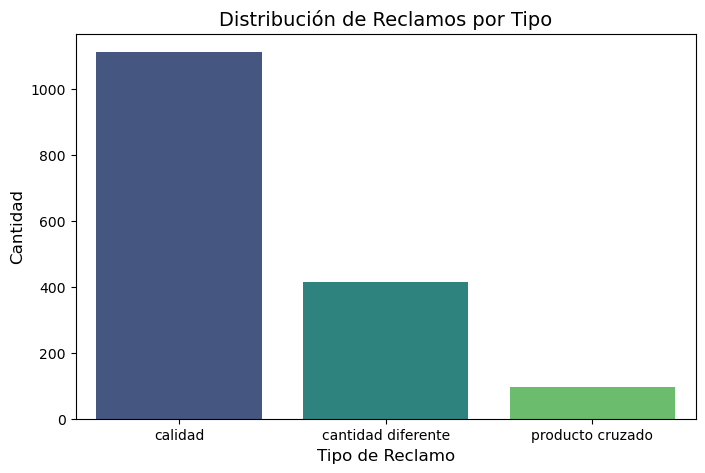

In [133]:
# Distribución de reclamos por tipo
claim_counts = df['type_claim'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=claim_counts.index, y=claim_counts.values, palette='viridis')
plt.title('Distribución de Reclamos por Tipo', fontsize=14)
plt.xlabel('Tipo de Reclamo', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.show()


In [134]:
print("Distribución de Reclamos por Tipo:")
print(claim_counts)


Distribución de Reclamos por Tipo:
type_claim
calidad               1113
cantidad diferente     416
producto cruzado        97
Name: count, dtype: int64


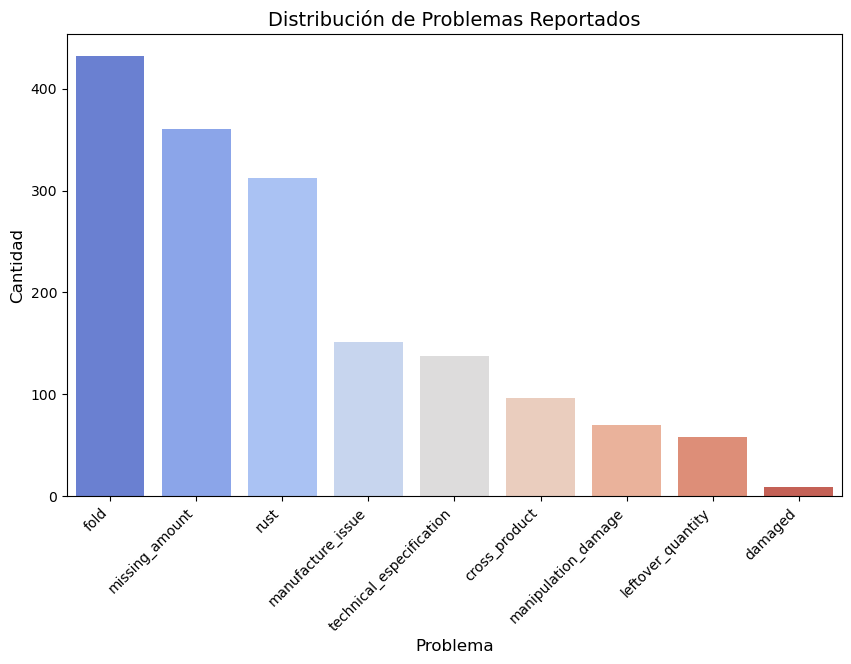

In [135]:
# Distribución de problemas
problem_counts = df['problem'].value_counts()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=problem_counts.index, y=problem_counts.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Problemas Reportados', fontsize=14)
plt.xlabel('Problema', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.show()


In [136]:
print("Distribución de Reclamos por Problema:")
print(problem_counts)


Distribución de Reclamos por Problema:
problem
fold                        432
missing_amount              360
rust                        312
manufacture_issue           151
technical_especification    138
cross_product                96
manipulation_damage          70
leftover_quantity            58
damaged                       9
Name: count, dtype: int64


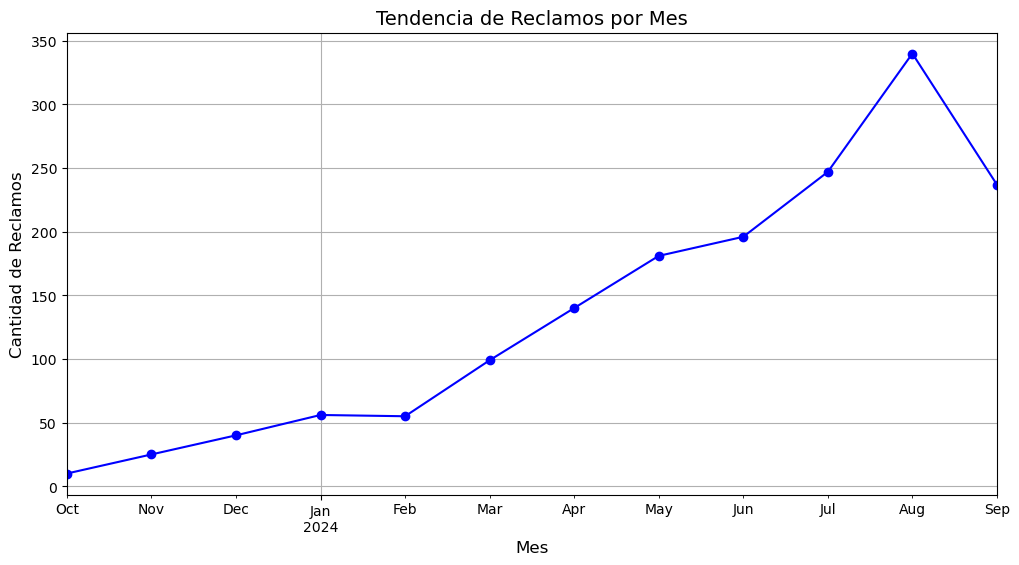

In [137]:
# Convertir a formato datetime si no lo está
df['date_created'] = pd.to_datetime(df['date_created'])

# Agregar una columna para meses
df['month'] = df['date_created'].dt.to_period('M')

# Reclamos por mes
claims_per_month = df['month'].value_counts().sort_index()

# Gráfico de línea
plt.figure(figsize=(12, 6))
claims_per_month.plot(kind='line', marker='o', color='b')
plt.title('Tendencia de Reclamos por Mes', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de Reclamos', fontsize=12)
plt.grid(True)
plt.show()


In [138]:
print("Tendencia de Reclamos por Mes:")
print(claims_per_month)

Tendencia de Reclamos por Mes:
month
2023-10     10
2023-11     25
2023-12     40
2024-01     56
2024-02     55
2024-03     99
2024-04    140
2024-05    181
2024-06    196
2024-07    247
2024-08    340
2024-09    237
Freq: M, Name: count, dtype: int64


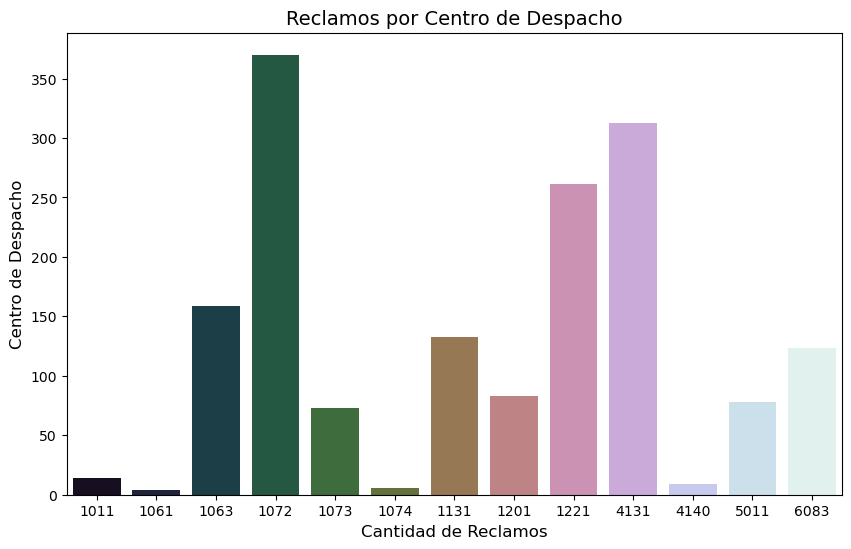

In [139]:
# Reclamos por centro de despacho
dispatch_counts = df['dispatch_center'].value_counts()

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(y=dispatch_counts.values, x=dispatch_counts.index , palette='cubehelix')
plt.title('Reclamos por Centro de Despacho', fontsize=14)
plt.xlabel('Cantidad de Reclamos', fontsize=12)
plt.ylabel('Centro de Despacho', fontsize=12)
plt.show()


In [140]:
print("Tendencia de Reclamos por Centro de despacho:")
print(dispatch_counts)

Tendencia de Reclamos por Centro de despacho:
dispatch_center
1072    370
4131    313
1221    261
1063    159
1131    133
6083    123
1201     83
5011     78
1073     73
1011     14
4140      9
1074      6
1061      4
Name: count, dtype: int64


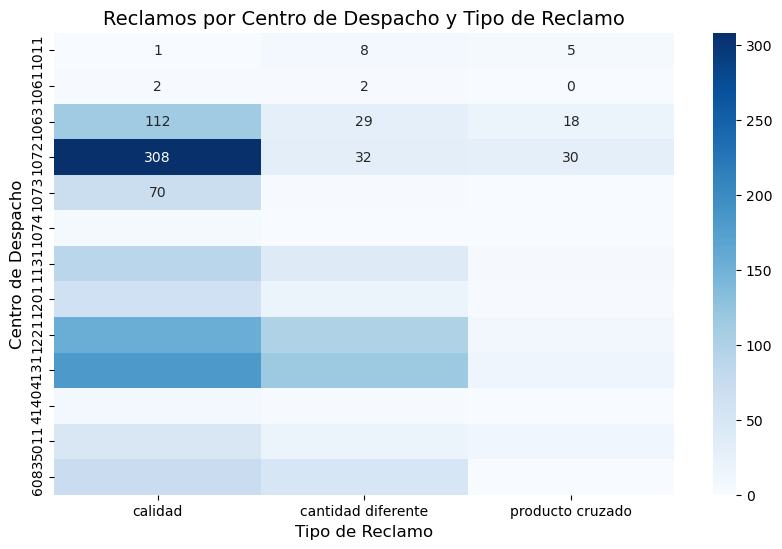

In [156]:
# Tabla cruzada entre tipo de reclamo y centro de despacho
pivot_dispatch_claim = pd.crosstab(df['dispatch_center'], df['type_claim'])

# Heatmap de la tabla cruzada
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_dispatch_claim, annot=True, cmap='Blues', fmt='d')
plt.title('Reclamos por Centro de Despacho y Tipo de Reclamo', fontsize=14)
plt.xlabel('Tipo de Reclamo', fontsize=12)
plt.ylabel('Centro de Despacho', fontsize=12)
plt.show()


In [142]:
print("Reclamos por Centro de Despacho y Tipo de Reclamo:")
print(pivot_dispatch_claim)

Reclamos por Centro de Despacho y Tipo de Reclamo:
type_claim       calidad  cantidad diferente  producto cruzado
dispatch_center                                               
1011                   1                   8                 5
1061                   2                   2                 0
1063                 112                  29                18
1072                 308                  32                30
1073                  70                   2                 1
1074                   5                   1                 0
1131                  90                  39                 4
1201                  63                  18                 2
1221                 154                  98                 9
4131                 182                 116                15
4140                   7                   2                 0
5011                  48                  18                12
6083                  71                  51                 1


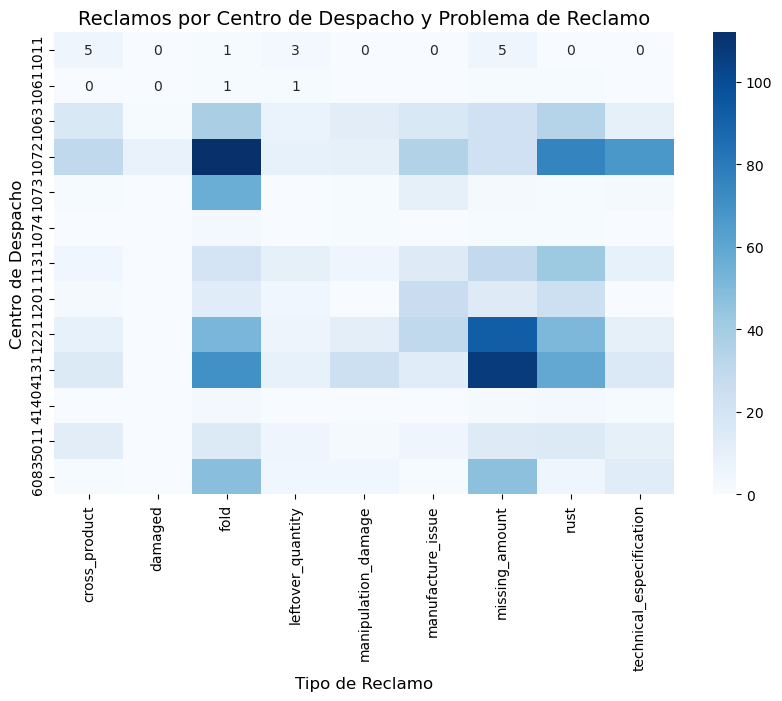

In [157]:
# Tabla cruzada entre tipo de reclamo y centro de despacho
pivot_dispatch_problem = pd.crosstab(df['dispatch_center'], df['problem'])

# Heatmap de la tabla cruzada
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_dispatch_problem, annot=True, cmap='Blues', fmt='d')
plt.title('Reclamos por Centro de Despacho y Problema de Reclamo', fontsize=14)
plt.xlabel('Tipo de Reclamo', fontsize=12)
plt.ylabel('Centro de Despacho', fontsize=12)
plt.show()

In [158]:
print("Reclamos por Centro de Despacho y Tipo de Reclamo:")
print(pivot_dispatch_problem)

Reclamos por Centro de Despacho y Tipo de Reclamo:
problem          cross_product  damaged  fold  leftover_quantity  \
dispatch_center                                                    
1011                         5        0     1                  3   
1061                         0        0     1                  1   
1063                        17        1    38                  7   
1072                        30        8   112                  9   
1073                         1        0    56                  0   
1074                         0        0     3                  0   
1131                         4        0    20                 10   
1201                         2        0    13                  4   
1221                         9        0    52                  6   
4131                        15        0    70                  9   
4140                         0        0     3                  0   
5011                        12        0    15                  5 

C:\Users\Lotus\AppData\Local\Temp\ipykernel_22600\1168595227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_problems['year_month'] = top_problems['date_created'].dt.to_period('M')


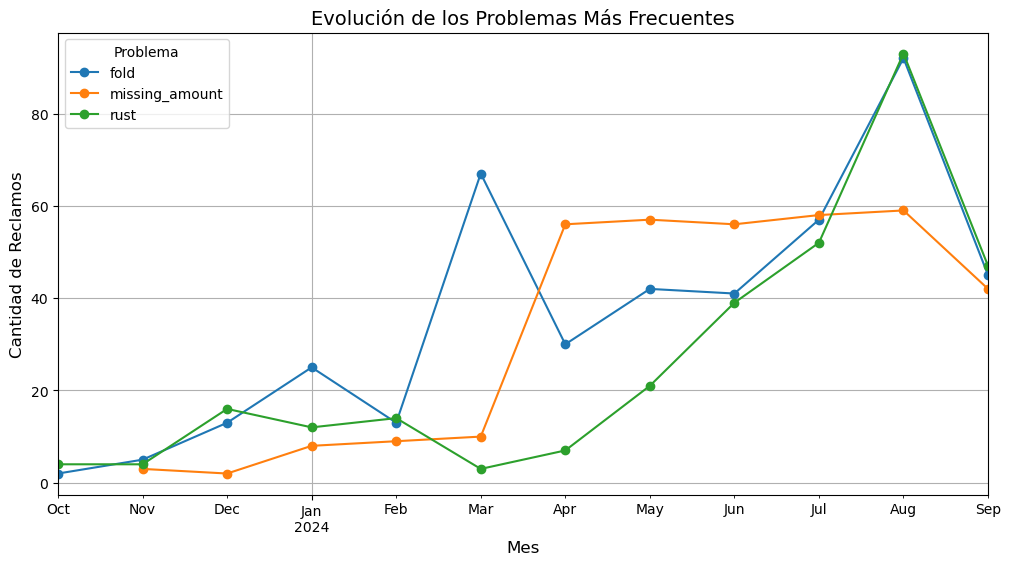

In [143]:
# Filtrar problemas principales
top_problems = df[df['problem'].isin(['fold', 'missing_amount', 'rust'])]

# Agregar columna de año-mes
top_problems['year_month'] = top_problems['date_created'].dt.to_period('M')

# Reclamos por mes y tipo de problema
problem_trend = top_problems.groupby(['year_month', 'problem']).size().unstack()

# Gráfico de líneas
problem_trend.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Evolución de los Problemas Más Frecuentes', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de Reclamos', fontsize=12)
plt.grid(True)
plt.legend(title='Problema', fontsize=10)
plt.show()


In [144]:
print("Evolución de los Problemas Más Frecuentes:")
print(problem_trend)

Evolución de los Problemas Más Frecuentes:
problem     fold  missing_amount  rust
year_month                            
2023-10      2.0             NaN   4.0
2023-11      5.0             3.0   4.0
2023-12     13.0             2.0  16.0
2024-01     25.0             8.0  12.0
2024-02     13.0             9.0  14.0
2024-03     67.0            10.0   3.0
2024-04     30.0            56.0   7.0
2024-05     42.0            57.0  21.0
2024-06     41.0            56.0  39.0
2024-07     57.0            58.0  52.0
2024-08     92.0            59.0  93.0
2024-09     45.0            42.0  47.0


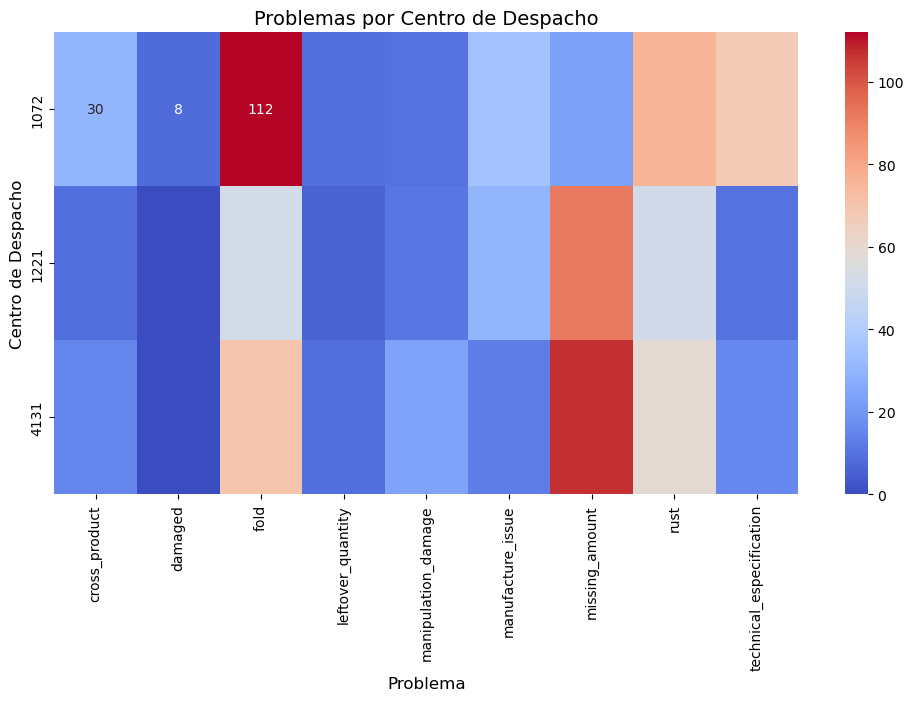

In [145]:
# Filtrar datos de los tres centros principales
top_dispatch_centers = df[df['dispatch_center'].isin([1072, 4131, 1221])]

# Distribución de problemas por centro de despacho
center_problem = pd.crosstab(top_dispatch_centers['dispatch_center'], top_dispatch_centers['problem'])

# Heatmap de problemas por centro
plt.figure(figsize=(12, 6))
sns.heatmap(center_problem, annot=True, cmap='coolwarm', fmt='d')
plt.title('Problemas por Centro de Despacho', fontsize=14)
plt.xlabel('Problema', fontsize=12)
plt.ylabel('Centro de Despacho', fontsize=12)
plt.show()


In [146]:
print("Problemas por Centro de Despacho:")
print(center_problem)

Problemas por Centro de Despacho:
problem          cross_product  damaged  fold  leftover_quantity  \
dispatch_center                                                    
1072                        30        8   112                  9   
1221                         9        0    52                  6   
4131                        15        0    70                  9   

problem          manipulation_damage  manufacture_issue  missing_amount  rust  \
dispatch_center                                                                 
1072                              10                 35              23    76   
1221                              11                 30              92    51   
4131                              24                 13             107    59   

problem          technical_especification  
dispatch_center                            
1072                                   67  
1221                                   10  
4131                                   16  

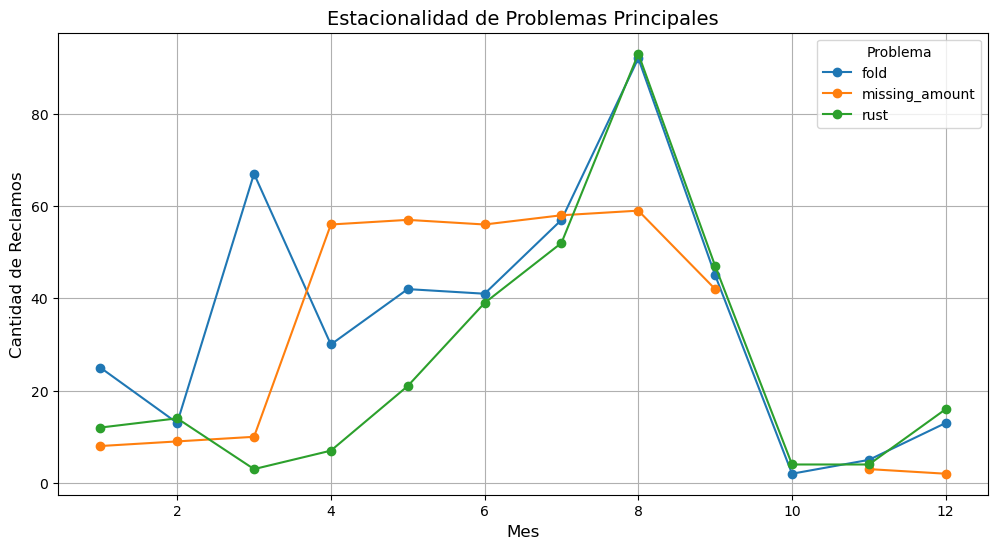

In [147]:
# Agregar columna de mes para análisis estacional
df['month'] = df['date_created'].dt.month

# Análisis estacional de problemas principales
seasonal_analysis = df[df['problem'].isin(['fold', 'missing_amount', 'rust'])].groupby(['month', 'problem']).size().unstack()

# Gráfico de líneas para problemas principales por mes
seasonal_analysis.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Estacionalidad de Problemas Principales', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de Reclamos', fontsize=12)
plt.grid(True)
plt.legend(title='Problema', fontsize=10)
plt.show()


In [148]:
print("Problemas por Centro de Despacho:")
print(seasonal_analysis)

Problemas por Centro de Despacho:
problem  fold  missing_amount  rust
month                              
1        25.0             8.0  12.0
2        13.0             9.0  14.0
3        67.0            10.0   3.0
4        30.0            56.0   7.0
5        42.0            57.0  21.0
6        41.0            56.0  39.0
7        57.0            58.0  52.0
8        92.0            59.0  93.0
9        45.0            42.0  47.0
10        2.0             NaN   4.0
11        5.0             3.0   4.0
12       13.0             2.0  16.0


In [149]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Cargar datos y preparar el dataset
X = df[['dispatch_center', 'product_number', 'reported_quantity', 'month']]
y = df['type_claim']

# Convertir variables categóricas a numéricas
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Entrenar un modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Evaluar el modelo
y_pred = model.predict(X_test)
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 5. Importancia de las características
feature_importances = model.feature_importances_
print("Importancia de características:")
for feature, importance in zip(encoder.get_feature_names_out(), feature_importances):
    print(f"{feature}: {importance:.4f}")


c:\Users\Lotus\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Matriz de Confusión:
[[314  14   2]
 [ 85  34   3]
 [ 31   3   2]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.73      0.95      0.83       330
           1       0.67      0.28      0.39       122
           2       0.29      0.06      0.09        36

    accuracy                           0.72       488
   macro avg       0.56      0.43      0.44       488
weighted avg       0.68      0.72      0.66       488

Importancia de características:
dispatch_center_1011: 0.0060
dispatch_center_1061: 0.0007
dispatch_center_1063: 0.0064
dispatch_center_1072: 0.0240
dispatch_center_1073: 0.0077
dispatch_center_1074: 0.0007
dispatch_center_1131: 0.0089
dispatch_center_1201: 0.0059
dispatch_center_1221: 0.0152
dispatch_center_4131: 0.0113
dispatch_center_4140: 0.0010
dispatch_center_5011: 0.0068
dispatch_center_6083: 0.0082
product_number_10000255: 0.0001
product_number_31000080: 0.0007
product_number_31000095: 0.0008
product_number_31000

In [150]:
model_balanced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model_balanced.fit(X_train, y_train)

# Evaluar de nuevo
y_pred_balanced = model_balanced.predict(X_test)
print("Matriz de Confusión (Balanceado):")
print(confusion_matrix(y_test, y_pred_balanced))
print("\nReporte de Clasificación (Balanceado):")
print(classification_report(y_test, y_pred_balanced))


Matriz de Confusión (Balanceado):
[[304  22   4]
 [ 74  45   3]
 [ 27   5   4]]

Reporte de Clasificación (Balanceado):
              precision    recall  f1-score   support

           0       0.75      0.92      0.83       330
           1       0.62      0.37      0.46       122
           2       0.36      0.11      0.17        36

    accuracy                           0.72       488
   macro avg       0.58      0.47      0.49       488
weighted avg       0.69      0.72      0.69       488



In [151]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [152]:
from imblearn.ensemble import BalancedRandomForestClassifier

model_balanced_rf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
model_balanced_rf.fit(X_train, y_train)
y_pred_balanced_rf = model_balanced_rf.predict(X_test)
print(classification_report(y_test, y_pred_balanced_rf))


c:\Users\Lotus\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\Lotus\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


              precision    recall  f1-score   support

           0       0.85      0.39      0.54       330
           1       0.44      0.71      0.55       122
           2       0.18      0.69      0.28        36

    accuracy                           0.49       488
   macro avg       0.49      0.60      0.46       488
weighted avg       0.70      0.49      0.52       488



In [153]:
df['quarter'] = pd.to_datetime(df['date_created']).dt.quarter
X2 = df[['dispatch_center', 'product_number', 'reported_quantity', 'month', 'quarter']]


In [154]:
from category_encoders import TargetEncoder

encoder = TargetEncoder()
X2['product_number_encoded'] = encoder.fit_transform(X2['product_number'], y)


ModuleNotFoundError: No module named 'category_encoders'

In [ ]:
print("Columnas en el DataFrame:", df.columnas)

AttributeError: 'DataFrame' object has no attribute 'columnas'

# Modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Codificar la columna 'type_claim' como nuestro target
label_encoder = LabelEncoder()
df['type_claim_encoded'] = label_encoder.fit_transform(df['type_claim'])

# Seleccionar las features relevantes
features = ['dispatch_center', 'country', 'reported_quantity', 'problem', 'month']
X = df[features]

# Codificar variables categóricas
X = pd.get_dummies(X, columns=['dispatch_center', 'country', 'problem', 'month'], drop_first=True)

# Target
y = df['type_claim_encoded']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar datos numéricos (si es necesario)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Mostrar dimensiones
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)


Dimensiones de X_train: (1300, 35)
Dimensiones de X_test: (326, 35)
Dimensiones de y_train: (1300,)
Dimensiones de y_test: (326,)


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1621    0
1622    1
1623    1
1624    0
1625    0
Name: type_claim_encoded, Length: 1626, dtype: int32

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Clases presentes en el conjunto de prueba
unique_classes = list(sorted(set(y_test)))

# Evaluación del modelo
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=[label_encoder.inverse_transform([cls])[0] for cls in unique_classes], labels=unique_classes))

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred, labels=unique_classes))


Reporte de Clasificación:
                    precision    recall  f1-score   support

           calidad       0.99      1.00      1.00       221
cantidad diferente       1.00      1.00      1.00        75
  producto cruzado       1.00      0.93      0.97        30

          accuracy                           0.99       326
         macro avg       1.00      0.98      0.99       326
      weighted avg       0.99      0.99      0.99       326


Matriz de Confusión:
[[221   0   0]
 [  0  75   0]
 [  2   0  28]]


In [ ]:
print("Clases en y_test:", set(y_test))
print("Clases en y_pred:", set(y_pred))


Clases en y_test: {0, 1, 2}
Clases en y_pred: {0, 1, 2}


In [ ]:
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


Matriz de Confusión:
[[221   0   0]
 [  0  75   0]
 [  2   0  28]]


In [ ]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
cv_scores = cross_val_score(
    rf_model,  # Modelo entrenado
    X_train,   # Datos de entrenamiento (sin el target)
    y_train,   # Etiquetas de entrenamiento
    cv=5,      # Número de "folds" en la validación cruzada
    scoring='accuracy'  # Métrica de evaluación
)

print(f"Exactitud promedio en validación cruzada: {cv_scores.mean():.4f}")
print(f"Desviación estándar: {cv_scores.std():.4f}")


Exactitud promedio en validación cruzada: 0.9885
Desviación estándar: 0.0064


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de cada característica
feature_importances = rf_model.feature_importances_

# Asociarlas con los nombres de las columnas
features = X_train.columns
sorted_idx = np.argsort(feature_importances)

# Visualización
plt.figure(figsize=(10, 8))
plt.barh(features[sorted_idx], feature_importances[sorted_idx], color='teal')
plt.xlabel('Importancia')
plt.title('Importancia de Características')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convertir las etiquetas para el cálculo de ROC (necesario para clasificaciones binarias)
y_test_binarized = label_binarize(y_test, classes=[0, 1])  # Aquí 0 y 1 corresponden a las clases

# Predecir probabilidades
y_score = rf_model.predict_proba(X_test)[:, 1]  # Probabilidad para clase "1"

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test_binarized, y_score)
roc_auc = auc(fpr, tpr)

# Gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


ValueError: multilabel-indicator format is not supported